In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K

from keras.utils import np_utils
from keras import optimizers
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import model_from_json

from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
K.clear_session() # Clear previous models from memory.

PATH = os.getcwd()
data_path = PATH + '/dataset'
data_dir_list = os.listdir(data_path)
#print(data_dir_list)

In [3]:
num_classes = 4

labels_name={'Candida_albicans':0,'Clostridium_perfringens':1,'Lactobacillus_paracasei':2,'Staphylococcus_saprophiticus':3}

image_list=[]
labels_list = []

training_data_path = PATH + '/dataset/Train'
train_data_dir_list = os.listdir(training_data_path)
#print(train_data_dir_list)

In [4]:
for folders in train_data_dir_list:
    train_img_list=os.listdir(training_data_path+'/'+ folders)
    print ('Loading the images of dataset-'+'{}\n'.format(folders))
    label = labels_name[folders]
    
    for img in train_img_list:
        input_img=cv2.imread(training_data_path + '/'+ folders + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        image_list.append(input_img)
        labels_list.append(label)

Loading the images of dataset-Candida_albicans

Loading the images of dataset-Clostridium_perfringens

Loading the images of dataset-Lactobacillus_paracasei

Loading the images of dataset-Staphylococcus_saprophiticus



2582


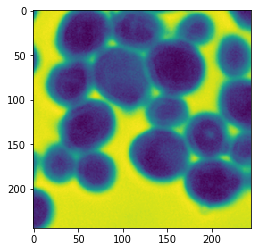

In [22]:
images = np.array(image_list)
images = images.astype('float32')
#print(images[0])
print(images.shape[0])
plt.imshow(np.reshape(images[1,:],(244,244)))
plt.savefig("GrayScale-Sample.png")


In [6]:
labels = np.array(labels_list)
trainImages, testImages, trainLabels, testLabels = train_test_split(images, labels, test_size=0.20, random_state=12344, shuffle = True)
print(np.unique(trainLabels))

[0 1 2 3]


In [7]:
trainLabels = np_utils.to_categorical(trainLabels)
#print(trainLabels)
testLabels = np_utils.to_categorical(testLabels)
numOfClasses = testLabels.shape[1]
#print("train labels shape", trainLabels.shape)


trainImages = trainImages.reshape(trainImages.shape[0],1, 244, 244).astype('float32')
testImages = testImages.reshape(testImages.shape[0],1, 244, 244).astype('float32')
## converting the pixel values in terms of zero and ones using min max scaling
trainImages = (trainImages-np.min(trainImages))/(np.max(trainImages)-np.min(trainImages))
testImages = (testImages-np.min(testImages))/(np.max(testImages)-np.min(testImages))
#print(trainImages)

K.set_image_dim_ordering('th')

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 input_shape=(1, 244, 244), 
                 activation='relu', 
                 name = "Conv1"))

model.add(
    MaxPooling2D(pool_size=(2, 2), 
                 name = "M1"))

model.add(Conv2D(filters = 64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 name = "Conv2"))

model.add(
    MaxPooling2D(pool_size=(2, 2), 
                 name = "M2"))

model.add(
    Flatten(name = "Flatten"))

model.add(
    Dense(units=64, 
          activation='relu', 
          name = 'Dense1'))

model.add(
    Dense(units=4, 
          activation='softmax', 
          name = 'Dense2'))

adam = optimizers.Adam(lr=0.00025, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


lr_reduce = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=10, verbose=2, mode='auto')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')












_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 242, 242)      320       
_________________________________________________________________
M1 (MaxPooling2D)            (None, 32, 121, 121)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 64, 119, 119)      18496     
_________________________________________________________________
M2 (MaxPooling2D)            (None, 64, 59, 59)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 222784)            0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                14258240  
_________________________________________________________________
Dense2 (Dense)               (None, 4)                 260       

In [9]:
history = model.fit(trainImages, trainLabels, validation_data=(testImages,testLabels), epochs=100, batch_size=90, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2065 samples, validate on 517 samples
Epoch 1/100
 - 11s - loss: 1.6556 - acc: 0.2412 - val_loss: 1.3857 - val_acc: 0.2592
Epoch 2/100
 - 7s - loss: 1.3650 - acc: 0.3109 - val_loss: 1.3548 - val_acc: 0.4371
Epoch 3/100
 - 7s - loss: 1.2223 - acc: 0.3811 - val_loss: 1.1241 - val_acc: 0.4197
Epoch 4/100
 - 7s - loss: 1.0702 - acc: 0.4358 - val_loss: 1.0395 - val_acc: 0.5242
Epoch 5/100
 - 7s - loss: 0.9859 - acc: 0.5230 - val_loss: 0.9549 - val_acc: 0.6093
Epoch 6/100
 - 7s - loss: 0.9136 - acc: 0.6073 - val_loss: 0.8960 - val_acc: 0.6615
Epoch 7/100
 - 7s - loss: 0.8408 - acc: 0.6484 - val_loss: 0.8195 - val_acc: 0.6809
Epoch 8/100
 - 7s - loss: 0.7841 - acc: 0.6809 - val_loss: 0.7783 - val_acc: 0.6963
Epoch 9/100
 - 7s - loss: 0.7420 - acc: 0.7012 - val_loss: 0.7331 - val_acc: 0.7118
Epoch 10/100
 - 7s - loss: 0.6962 - acc: 0.7104 - val_loss: 0.6807 - val_acc: 0.7253
Epoch 11/100
 -

Epoch 89/100
 - 9s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3311 - val_acc: 0.9149
Epoch 90/100
 - 9s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3219 - val_acc: 0.9188
Epoch 91/100
 - 8s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3481 - val_acc: 0.9207
Epoch 92/100
 - 7s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3309 - val_acc: 0.9207
Epoch 93/100
 - 7s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3168 - val_acc: 0.9110
Epoch 94/100
 - 8s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3396 - val_acc: 0.9188
Epoch 95/100
 - 9s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3344 - val_acc: 0.9188
Epoch 96/100
 - 10s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3288 - val_acc: 0.9168
Epoch 97/100
 - 9s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3273 - val_acc: 0.9149
Epoch 98/100
 - 8s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3426 - val_acc: 0.9130
Epoch 99/100
 - 8s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3294 - val_acc: 0.9188
Epoch 100/100
 - 10s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.

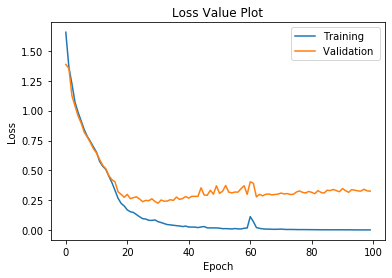

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Value Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation '], loc='upper right')
plt.savefig("Loss Plot.png")
plt.show()


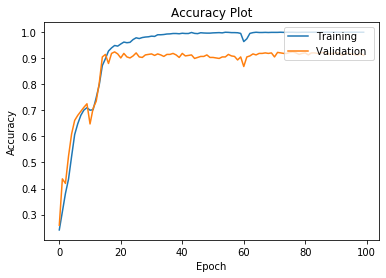

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation '], loc='upper right')
plt.savefig("Accuracy Plot.png")
plt.show()


In [ ]:
model.save("bacteria-classifier.h5", include_optimizer=True)

model_json = model.to_json()
with open("bacteria_model.json", "w") as json_file:
    json_file.write(model_json)
json_file.close()


In [15]:
va_labels_name={'Candida_albicans':0,'Clostridium_perfringens':1,'Lactobacillus_paracasei':2,'Staphylococcus_saprophiticus':3}

validation_image_list=[]
validation_label_list=[]

validation_data_path = PATH + '/dataset/Validation'
validation_data_dir_list = os.listdir(validation_data_path)
print(validation_data_path)

for folders in validation_data_dir_list:
    va_img_list=os.listdir(validation_data_path+'/'+ folders)
    print ('Loading the images of dataset-'+'{}\n'.format(folders))
    label = va_labels_name[folders]

    for img in va_img_list:
        input_img=cv2.imread(validation_data_path + '/'+ folders + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        validation_image_list.append(input_img)
        validation_label_list.append(label)

C:\Users\rohan\Documents\Project - Deep Learning/dataset/Validation
Loading the images of dataset-Candida_albicans

Loading the images of dataset-Clostridium_perfringens

Loading the images of dataset-Lactobacillus_paracasei

Loading the images of dataset-Staphylococcus_saprophiticus



In [16]:
va_Images = np.array(validation_image_list)
va_Images = va_Images.astype('float32')
va_Labels = np.array(validation_label_list)
print(np.unique(va_Labels))
va_Labels = np_utils.to_categorical(va_Labels)
print(va_Labels.shape)
print(va_Labels)
va_Images = va_Images.reshape(va_Images.shape[0],1, 244, 244).astype('float32')
## converting the pixel values in terms of zero and ones using min max scaling
va_Images = (va_Images-np.min(va_Images))/(np.max(va_Images)-np.min(va_Images))
print(va_Images.shape)


[0 1 2 3]
(1438, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
(1438, 1, 244, 244)


In [17]:
testPred = model.predict_classes(va_Images)
predProbabilities = model.predict(va_Images)

In [18]:
np.savetxt("test_pred.csv", testPred, fmt="%s", delimiter=" ", newline="\n")
np.savetxt("test_pred_probabilities.csv", predProbabilities, fmt="%s", delimiter=" ", newline="\n")

testLabelsOriginal = np.argmax(va_Labels, axis=1)

print("Classification report ")
print(classification_report(y_true=testLabelsOriginal, y_pred=testPred))

Classification report 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       426
           1       0.87      0.78      0.82       282
           2       0.99      1.00      1.00       377
           3       0.85      0.94      0.89       353

    accuracy                           0.93      1438
   macro avg       0.92      0.92      0.92      1438
weighted avg       0.93      0.93      0.93      1438



In [19]:
print("Confusion matrix ")
print(confusion_matrix(y_true=testLabelsOriginal, y_pred=testPred))
print("\n")

Confusion matrix 
[[409  16   0   1]
 [  1 221   2  58]
 [  0   0 377   0]
 [  4  17   1 331]]


